<a href="https://colab.research.google.com/github/raghavkaushik/DeepLearning/blob/main/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(Xtrain,Ytrain),(Xtest,Ytest)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
Xtrain,Xtest=Xtrain/255.0 , Xtest/255.0

In [5]:
print("Shape of the model:",Xtrain.shape)

Shape of the model: (60000, 28, 28)


In [8]:
#build the model
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(10,activation='softmax')
])

In [9]:
model.compile(optimizer='adam'
              ,loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

r=model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2916 - accuracy: 0.9147 - val_loss: 0.1421 - val_accuracy: 0.9563
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1414 - accuracy: 0.9577 - val_loss: 0.1022 - val_accuracy: 0.9680
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1069 - accuracy: 0.9673 - val_loss: 0.0833 - val_accuracy: 0.9748
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0870 - accuracy: 0.9731 - val_loss: 0.0763 - val_accuracy: 0.9760
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0754 - accuracy: 0.9757 - val_loss: 0.0744 - val_accuracy: 0.9780
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0649 - accuracy: 0.9789 - val_loss: 0.0702 - val_accuracy: 0.9780
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9812 - val_loss: 0.0717 - val_accuracy:

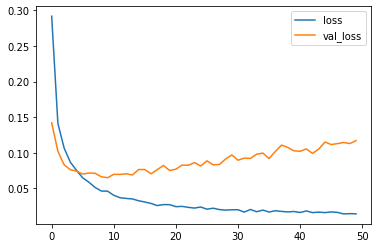

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

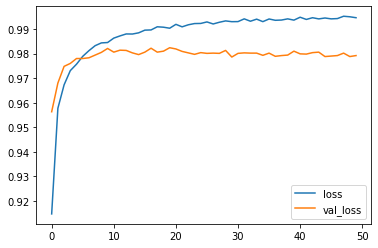

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='loss')
plt.plot(r.history['val_accuracy'], label='val_loss')
plt.legend()

In [13]:
print(model.evaluate(Xtest, Ytest))

313/313 [==============================] - 1s 4ms/step - loss: 0.1171 - accuracy: 0.9792
[0.1170741468667984, 0.979200005531311]


In [17]:
pred=model.predict(Xtest).argmax(axis=1)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
print(confusion_matrix(Ytest,pred))

[[ 970    0    2    2    1    1    2    1    1    0]
 [   0 1127    2    1    0    1    2    1    1    0]
 [   2    0 1011    2    2    1    1    7    5    1]
 [   0    0    1  991    0    3    0    6    1    8]
 [   2    0    3    1  965    0    2    2    0    7]
 [   2    0    0    5    1  871    5    3    2    3]
 [   6    1    1    1    6    3  940    0    0    0]
 [   2    2   11    3    0    0    0 1004    0    6]
 [   5    0    5    6    6    6    3    5  931    7]
 [   1    2    0    3    9    2    0    8    2  982]]
